# Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Import Dataset

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.set_index('PassengerId', inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling Missing Values

<AxesSubplot:ylabel='PassengerId'>

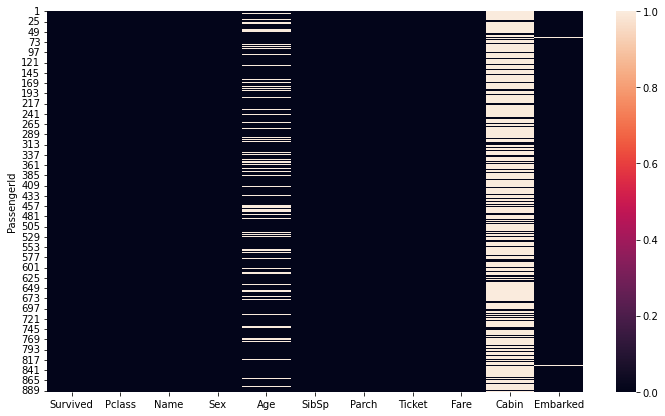

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(train.isnull())

In [9]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
categorical_columns = [col for col in train.columns if train[col].dtype == 'O']
numerical_columns = [col for col in train.columns if train[col].dtype != 'O']

In [11]:
categorical_with_na = [col for col in categorical_columns if train[col].isnull().sum() > 0]
numerical_with_na = [col for col in numerical_columns if train[col].isnull().sum() > 0]

In [12]:
numerical_with_na

['Age']

In [13]:
categorical_with_na

['Cabin', 'Embarked']

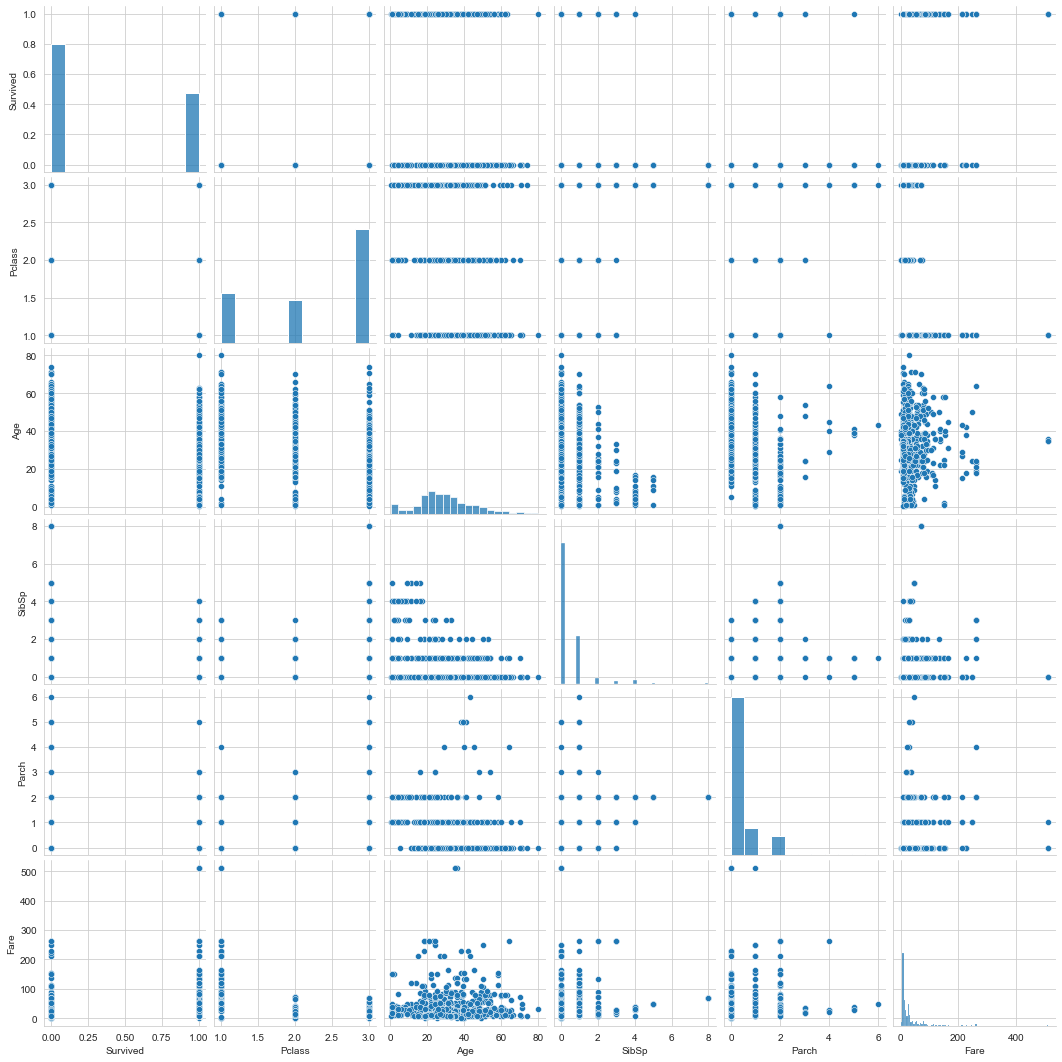

In [52]:
sns.pairplot(train)

## 1) Drop row / column

In [54]:
train_drop = train.copy()

In [55]:
train_drop.Embarked.dropna(axis=0, inplace=True) # column Embarked has only 2 rows with missing values

In [59]:
train_drop.drop(['Cabin'], axis=1, inplace=True) # column Cabin has more than 70% data missing

## 2) Mean/Median Imputation

In [15]:
train['Age'].mean()

29.69911764705882

<AxesSubplot:xlabel='Age', ylabel='Density'>

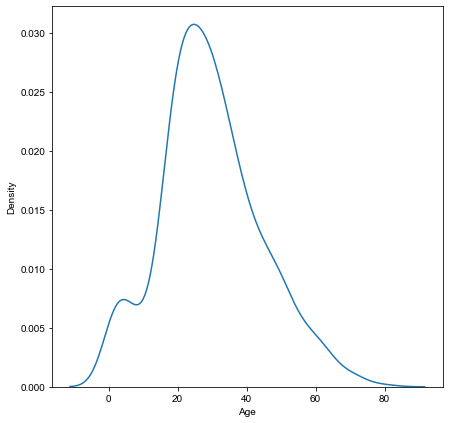

In [16]:
fig, axes = plt.subplots(1,1, figsize=(7, 7))
sns.set_style('whitegrid')
sns.kdeplot(train.Age)

In [17]:
train_mean = train.copy()
train_mean['Age'] = train.Age.fillna(train.Age.mean())

In [18]:
train_mode = train.copy()
train_mode['Age'] = train.Age.fillna(train.Age.median())

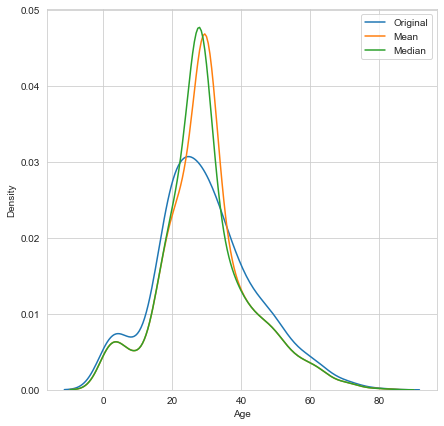

In [19]:
fig, axes = plt.subplots(1,1, figsize=(7, 7))
sns.set_style('whitegrid')
sns.kdeplot(train.Age, label='Original')
sns.kdeplot(train_mean.Age, label='Mean')
sns.kdeplot(train_mode.Age, label='Median')
axes.legend()

## 3) Most Frequent Imputation

In [60]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

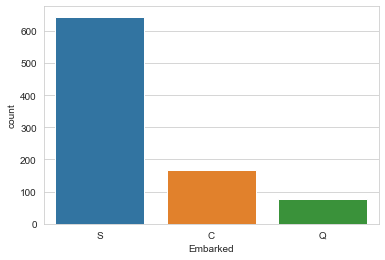

In [61]:
sns.countplot(x='Embarked', data=train)

In [62]:
train_frequent = train.copy()

In [66]:
train_frequent.Embarked.fillna('S', inplace=True)

## 4) Unknown Value Imputation

In [172]:
train_unknown = train.copy()

In [175]:
train_unknown.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [164]:
train_unknown.Cabin.fillna('U', inplace=True)
# train_unknown.Cabin = train_unknown.apply(replace_with_k, axis=1)
train_unknown.Cabin = np.where(train_unknown.Cabin != 'U', 'K', 'U')

In [165]:
train_unknown.Cabin.value_counts()

U    687
K    204
Name: Cabin, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

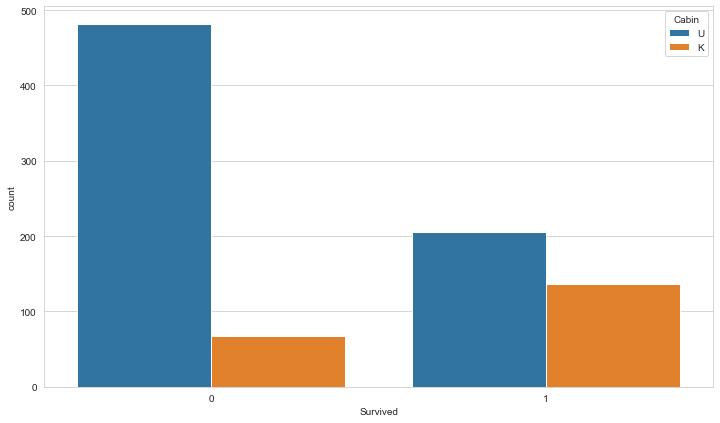

In [169]:
fig = plt.figure(figsize=(12,7))
sns.countplot(x='Survived', data=train_unknown, hue='Cabin')

##### Note:  After replacing know values with 'K' and unknown values with 'U' we can see that more people that didnt survive have unknown cabin type

### 5) Prediction of Missing Values

In [98]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [99]:
X_train_age = train[['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket','Fare', 'Cabin','Embarked', 'Age']].copy()
y_train_age = train[['Age']].copy()

In [100]:
for column in X_train_age:
    if X_train_age[column].isnull().sum() > 0 and column != 'Age':
        X_train_age.drop([column], axis=1, inplace=True)

In [101]:
X_train_age.dropna(axis=0, inplace=True)
X_train_age.drop(['Age'], axis=1, inplace=True)

In [102]:
y_train_age.dropna(axis=0, inplace=True)

In [103]:
X_train_age.shape

(714, 7)

In [104]:
y_train_age.shape

(714, 1)

In [105]:
X_train_age.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [106]:
y_pred = train.loc[train.Age.isnull(), X_train_age.columns]

In [107]:
X_train_age

,Pclass,Sex,SibSp,Parch,Fare
PassengerId,,,,,
1,3,male,1,0,7.2500
2,1,female,1,0,71.2833
3,3,female,0,0,7.9250
4,1,female,1,0,53.1000
5,3,male,0,0,8.0500
...,...,...,...,...,...
886,3,female,0,5,29.1250
887,2,male,0,0,13.0000
888,1,female,0,0,30.0000


In [108]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), ['Sex'])], remainder='passthrough')

X_train_age = ct.fit_transform(X_train_age)

y_pred = ct.transform(y_pred)

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_age[:, 1:] = scaler.fit_transform(X_train_age[:, 1:])
y_pred[:, 1:] = scaler.fit_transform(y_pred[:, 1:])

y_train_age = y_scaler.fit_transform(y_train_age)

In [31]:
import xgboost as xgb

age_regressor = xgb.XGBRegressor()

In [32]:
age_regressor.fit(X_train_age, y_train_age)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
null_age = y_scaler.inverse_transform(age_regressor.predict(y_pred))

In [38]:
train_pred_age = train.copy()    

In [39]:
null_age_id = train.loc[train.Age.isnull(), :].index
train_pred_age.loc[train.loc[train.Age.isnull(), :].index, 'Age'] = null_age

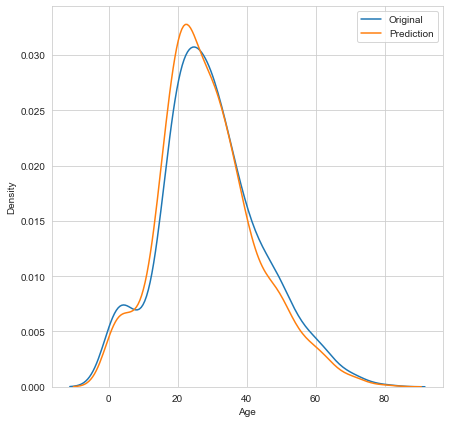

In [40]:
fig, axes = plt.subplots(1,1, figsize=(7, 7))
sns.set_style('whitegrid')
sns.kdeplot(train.Age, label='Original')
sns.kdeplot(train_pred_age.Age, label='Prediction')
axes.legend()

In [ ]:
train.fillna(method=)

## Actual Problem Solving

In [194]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [195]:
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

In [197]:
train.drop(['Name', 'Ticket'], axis=1, inplace=True)
test.drop(['Name', 'Ticket'], axis=1, inplace=True)

<AxesSubplot:ylabel='PassengerId'>

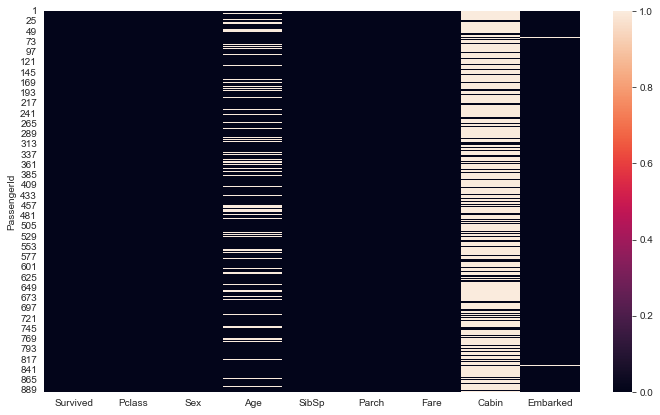

In [198]:
plt.figure(figsize=(12,7))
sns.heatmap(train.isnull())

<AxesSubplot:ylabel='PassengerId'>

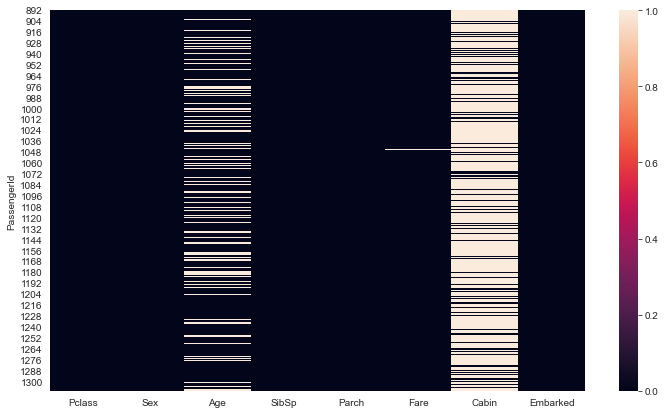

In [199]:
plt.figure(figsize=(12,7))
sns.heatmap(test.isnull())

### Embarked

In [201]:
train.Embarked.fillna('S', inplace=True)

### Fare

In [204]:
test.Fare.fillna(np.mean(test.Fare), inplace=True)

### Cabin

In [205]:
train.Cabin.fillna('U', inplace=True)
train.Cabin = np.where(train.Cabin != 'U', 'K', 'U')

In [207]:
test.Cabin.fillna('U', inplace=True)
test.Cabin = np.where(test.Cabin != 'U', 'K', 'U')

### Age

In [291]:
column = ['Pclass', 'Sex', 'SibSp', 'Parch','Fare', 'Cabin','Embarked', 'Age']

In [292]:
X_train_age = train[['Pclass', 'Sex', 'SibSp', 'Parch','Fare', 'Cabin','Embarked', 'Age']].copy()
y_train_age = train[['Age']].copy()
X_test_train_age = test[['Pclass', 'Sex', 'SibSp', 'Parch','Fare', 'Cabin','Embarked', 'Age']].copy()
y_test_train_age = test[['Age']].copy()

In [293]:
for column in X_train_age:
    if X_train_age[column].isnull().sum() > 0 and column != 'Age':
        X_train_age.drop([column], axis=1, inplace=True)

for column in X_test_train_age:
    if X_test_train_age[column].isnull().sum() > 0 and column != 'Age':
        X_test_train_age.drop([column], axis=1, inplace=True)

In [294]:
X_train_age.dropna(axis=0, inplace=True)
X_train_age.drop(['Age'], axis=1, inplace=True)

X_test_train_age.dropna(axis=0, inplace=True)
X_test_train_age.drop(['Age'], axis=1, inplace=True)

In [295]:
y_train_age.dropna(axis=0, inplace=True)
y_test_train_age.dropna(axis=0, inplace=True)

In [296]:
age_X_train = pd.concat([X_train_age, X_test_train_age])

In [297]:
age_y_train = pd.concat([y_train_age, y_test_train_age])

In [298]:
y_train_pred = train.loc[train.Age.isnull(), X_train_age.columns]
y_test_pred = test.loc[test.Age.isnull(), X_test_train_age.columns]

In [299]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

age_ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), ['Sex', 'Cabin', 'Embarked'])], remainder='passthrough')

age_X_train = age_ct.fit_transform(age_X_train)

y_train_pred = age_ct.transform(y_train_pred)
y_test_pred = age_ct.transform(y_test_pred)

In [255]:
from sklearn.preprocessing import StandardScaler

age_scaler = StandardScaler()
age_y_scaler = StandardScaler()

age_X_train = age_scaler.fit_transform(age_X_train)
age_y_train = age_y_scaler.fit_transform(age_y_train)

X_test_age = age_scaler.fit_transform(X_test_age)
y_test_pred[:, 1:] = age_scaler.transform(y_test_pred[:, 1:])

y_train_age = y_scaler.fit_transform(y_train_age)
y_test_age  = y_scaler.fit_transform(y_test_age)

In [256]:
import xgboost as xgb

age_regressor = xgb.XGBRegressor()

In [257]:
age_regressor.fit(X_train_age, y_train_age)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Embarked

In [41]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [43]:
def compute_age_category(row):
    
    age = row.Age
    category = None
    
    if age < 10:
        category = 'infant'
    elif age < 20:
        category = 'teen'
    elif age < 55:
        category = 'adult'
    else:
        category = 'old'
    
    return category

In [44]:
train_embarked = train_pred_age.copy()

In [45]:
train_embarked['Age_class'] = train_pred_age.apply(compute_age_category, axis=1)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

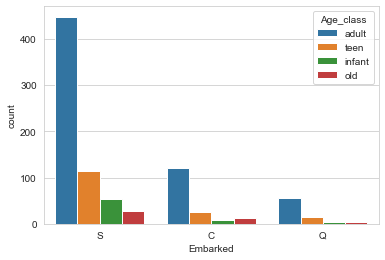

In [46]:
sns.countplot(x='Embarked', data=train_embarked, hue='Age_class')

In [47]:
train_embarked[train_embarked.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_class
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,adult
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,old


In [48]:
train_embarked.loc[62, 'Embarked'] = 'S'
train_embarked.loc[830, 'Embarked'] = 'S'

<AxesSubplot:xlabel='Fare', ylabel='Fare'>

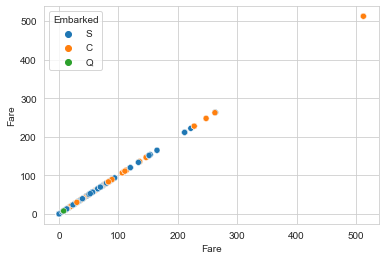

In [49]:
sns.scatterplot(x='Fare', y='Fare', data=train_embarked, hue='Embarked')

In [50]:
train[(train_embarked.Fare > 65) & (train_embarked.Fare < 95)].groupby('Embarked').size()

Embarked
C    23
Q     2
S    36
dtype: int64

In [51]:
train[(train_embarked.Fare > 79) & (train_embarked.Fare < 81)].groupby('Embarked').size()

Embarked
C    4
S    3
dtype: int64